# Exploración

Importamos librerías necesarias:

In [112]:
#instalamos las librerías necesarias
import os  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn
import missingno as msno
from scipy.stats import skew

from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer, KNNImputer

from sklearn.feature_selection import SelectKBest, chi2, RFE, RFECV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, Binarizer, RobustScaler, label_binarize
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, PowerTransformer
from sklearn.preprocessing import FunctionTransformer

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import BaggingClassifier,  GradientBoostingClassifier, StackingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFECV
import xgboost as xgb


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_auc_score, roc_curve, auc, precision_score, recall_score
from sklearn.model_selection import RepeatedKFold, cross_val_predict, cross_val_score, GridSearchCV, KFold, LeaveOneOut, RandomizedSearchCV

import tensorflow as tf
from tensorflow import keras
from tensorflow import get_logger
from tensorflow.keras import layers

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold 
from sklearn.metrics import ConfusionMatrixDisplay
from scikeras.wrappers import KerasClassifier

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

# Cargo las funciones que voy a utilizar
from FuncionesMineria import *


Funciones útiles:

In [91]:
def plot_confusion_matrix(X, y, gsearch, p, seed):
  print('\n================================================')
  print('MATRIZ DE CONFUSION:')
  print('================================================')
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state=seed)

  y_hat_train = gsearch.predict(X_train)
  y_hat_test = gsearch.predict(X_test)

  print('Confusion matrix train:\n', 'Train score: ', round(gsearch.score(X_train, y_train),3))
  ConfusionMatrixDisplay.from_estimator(estimator=gsearch, X=X_train, y=y_train)
  plt.show()

  print('\nConfusion matrix test:\n','Test score: ', round(gsearch.score(X_test, y_test), 3))
  ConfusionMatrixDisplay.from_estimator(estimator=gsearch, X=X_test, y=y_test)  
  plt.show()

In [92]:
# Load the data
data = pd.read_csv("C:\\Users\\pablo\\OneDrive\\Documentos\\GitHub\\MasterBigDataML-MachineLearningI\\src\\data\\datos_practica_miss.csv")

data = data.sample(n=1000, random_state=4975)
data.head(10)

,Unnamed: 0,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
371,371,Male,17.000000,1.620000,69.000000,yes,yes,3.000000,1.000000,Always,no,2.000000,yes,1.000000,2.000000,NaN,NaN,Overweight_Level_I
395,395,Female,20.000000,1.540000,39.000000,yes,yes,1.000000,3.000000,Sometimes,no,2.000000,no,3.000000,2.000000,Sometimes,Public_Transportation,Insufficient_Weight
350,350,Male,17.000000,1.750000,70.000000,yes,no,2.000000,3.000000,Sometimes,no,1.000000,no,3.000000,2.000000,Sometimes,Walking,Normal_Weight
1216,1216,Female,42.316070,1.583943,81.936398,yes,yes,2.490507,2.974204,Sometimes,no,1.846754,no,0.000000,0.000000,no,Automobile,Obesity_Type_I
2025,2025,Female,21.394047,1.792933,137.832414,yes,yes,3.000000,3.000000,Sometimes,no,2.682909,no,1.318743,0.900497,Sometimes,Public_Transportation,Obesity_Type_III
1729,1729,NaN,29.669219,NaN,129.194490,NaN,yes,2.432355,NaN,Sometimes,no,1.336526,NaN,1.638120,NaN,NaN,NaN,NaN
1652,1652,Male,25.058566,1.764484,113.234349,yes,yes,1.517912,3.000000,Sometimes,no,2.038958,no,1.590255,0.001640,Sometimes,Public_Transportation,Obesity_Type_II
2016,2016,Female,25.940153,1.596813,102.320437,yes,yes,3.000000,3.000000,Sometimes,no,1.000536,no,0.005939,0.566353,Sometimes,Public_Transportation,Obesity_Type_III
364,364,Male,24.000000,1.840000,86.000000,yes,yes,2.000000,1.000000,Always,no,2.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Overweight_Level_I
855,855,Male,21.000000,1.676014,75.000000,yes,yes,2.000000,3.000000,Sometimes,no,1.164062,no,1.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_I


Vemos los tipos de las variables:

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 371 to 1382
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      1000 non-null   int64  
 1   Gender                          983 non-null    object 
 2   Age                             977 non-null    float64
 3   Height                          975 non-null    float64
 4   Weight                          977 non-null    float64
 5   family_history_with_overweight  976 non-null    object 
 6   FAVC                            975 non-null    object 
 7   FCVC                            977 non-null    float64
 8   NCP                             973 non-null    float64
 9   CAEC                            975 non-null    object 
 10  SMOKE                           984 non-null    object 
 11  CH2O                            980 non-null    float64
 12  SCC                             981 n

In [94]:
# Obtener los nombres de las columnas del DataFrame
column_names = data.columns.tolist()
column_names

['Unnamed: 0',
 'Gender',
 'Age',
 'Height',
 'Weight',
 'family_history_with_overweight',
 'FAVC',
 'FCVC',
 'NCP',
 'CAEC',
 'SMOKE',
 'CH2O',
 'SCC',
 'FAF',
 'TUE',
 'CALC',
 'MTRANS',
 'NObeyesdad']

## ATIPICOS

Cuento el porcentaje de atipicos de cada variable. 

In [95]:
numerical_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
categorical_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

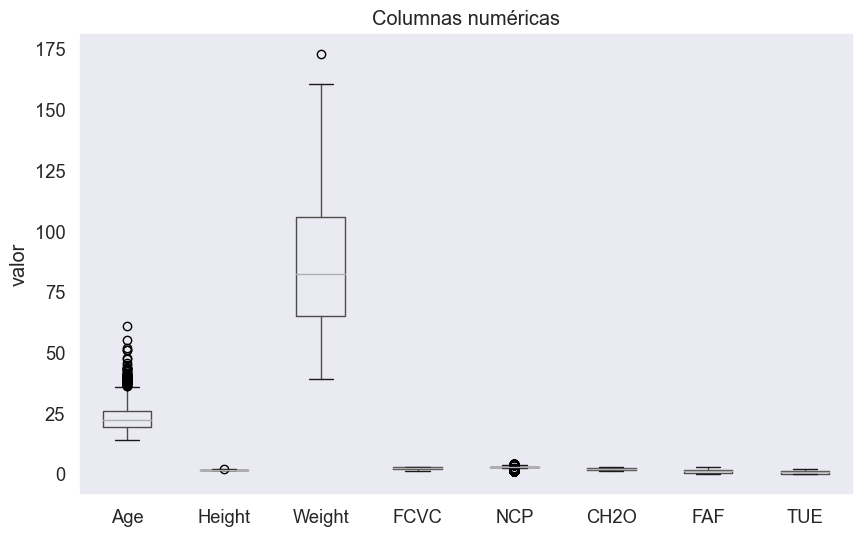

In [96]:
# Creating a boxplot for each numeric column
plt.figure(figsize=(10, 6))
data[numerical_columns].boxplot()
plt.title('Columnas numéricas')
plt.ylabel('valor')
plt.grid(False)
plt.show()

Solo vamos a corregir los valores atípicos de NCP, pues los de *Age*, *Height*, y *Weight* no deben eliminarse:

In [97]:
numerical_column_outliers = ['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

resultados = {x: atipicosAmissing(data[x])[1] / len(data) for x in numerical_column_outliers}

print(resultados)

{'FCVC': 0.0, 'NCP': 0.0, 'CH2O': 0.0, 'FAF': 0.0, 'TUE': 0.0}


In [98]:
# Modifico los atipicos como missings
for x in numerical_column_outliers:
    data[x] = atipicosAmissing(data[x])[0]

In [99]:
resultados = {x: atipicosAmissing(data[x])[1] / len(data) for x in numerical_column_outliers}

print(resultados)

{'FCVC': 0.0, 'NCP': 0.0, 'CH2O': 0.0, 'FAF': 0.0, 'TUE': 0.0}


## Valores perdidos

Buscamos valores nulos:

In [100]:
#busca nulos
data.isna().sum()

Unnamed: 0                         0
Gender                            17
Age                               23
Height                            25
Weight                            23
family_history_with_overweight    24
FAVC                              25
FCVC                              23
NCP                               27
CAEC                              25
SMOKE                             16
CH2O                              20
SCC                               19
FAF                               27
TUE                               19
CALC                              19
MTRANS                            20
NObeyesdad                        20
dtype: int64

In [101]:
#busca duplicados
print(data.duplicated().sum()) #para ver si hay alguna obs duplicada
print(data.shape) #tamaño (filasxcolumnas) del archivo
data = data.drop_duplicates() #eliminar duplicados (si procede)
print(data.duplicated().sum())
print(data.shape)

0
(1000, 18)
0
(1000, 18)


Usando la librería Missingno visualiazmos grafiacmente los valores perdidos:

<Axes: >

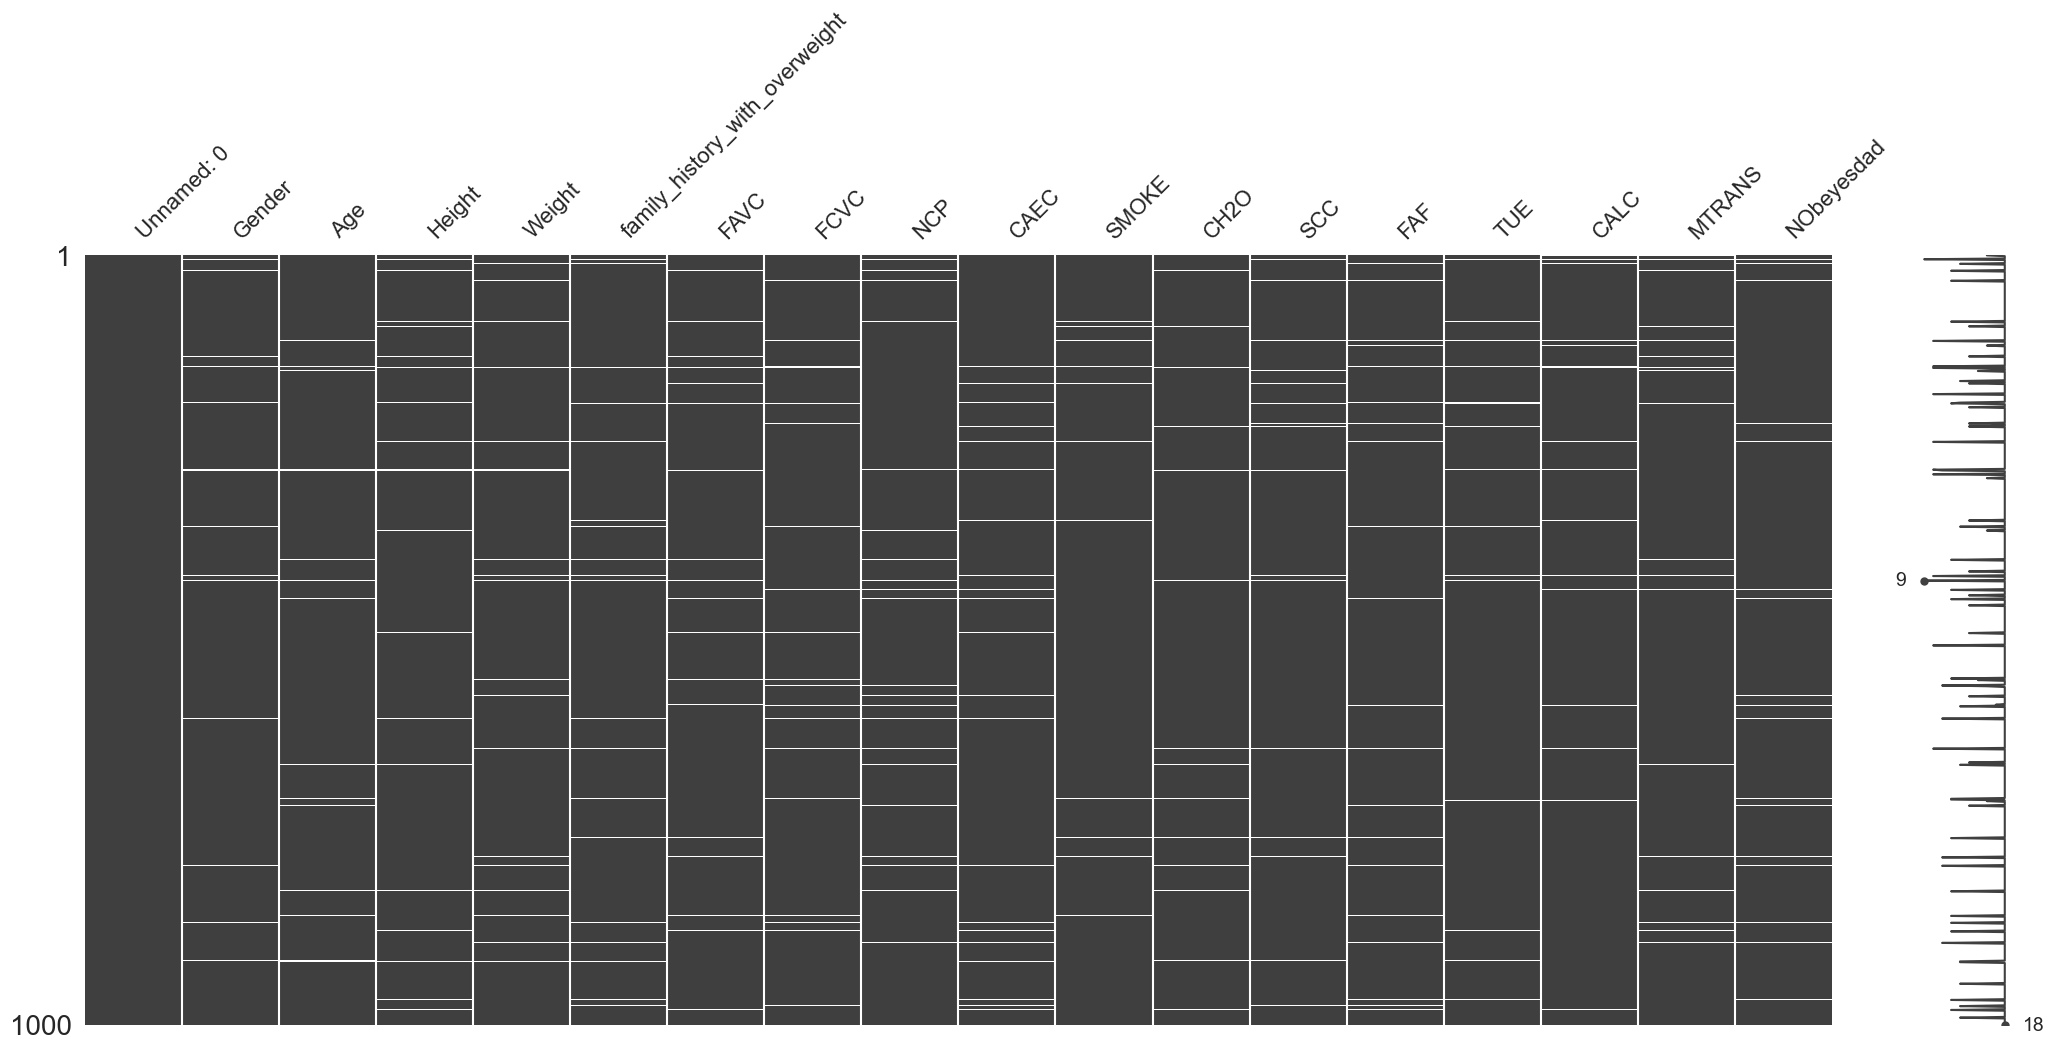

In [102]:
# Visualize the missing data using missingno's matrix visualization
msno.matrix(data)

Vemos que para lidiar con los valores perdidos tendremos que hacer un análisis por variable imputando sus valores perdidos.

En primer lugar eliminamos las filas con valores perdidos en la variable objetivo. Después eliminamos la primera columna pues no parece relevante para el análisis. Después imputamos valores perdidios sustituyendo las numéricas por la media o mediana y las categóricas por la moda: 

In [103]:
# Drop the 'Unnamed: 0' column as it's redundant
data.drop('Unnamed: 0', axis=1, inplace=True)

# Remove rows where the target variable 'NObeyesdad' is missing
data = data.dropna(subset=['NObeyesdad'])


for column in numerical_columns:
    if abs(skew(data[column].dropna())) > 1:
        # If skewed, use median for imputation
        data[column].fillna(data[column].median(), inplace=True)
    else:
        # If not skewed, use mean for imputation
        data[column].fillna(data[column].mean(), inplace=True)


for column in categorical_columns:
    data[column].fillna(data[column].mode()[0], inplace=True)

# Check for any remaining missing values
data.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

Vamos a sustituir los valores de la variable objetivo en 0 o 1 dependiendo de si es un caso de Obesidad (0), No obesidad (1).

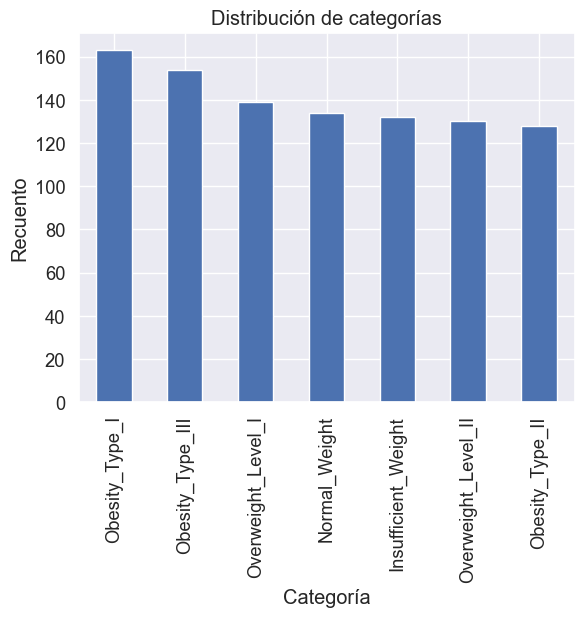

In [104]:
data['NObeyesdad'].value_counts().plot(kind='bar')
plt.title('Distribución de categorías')
plt.xlabel('Categoría')
plt.ylabel('Recuento')
plt.show()

In [105]:
obesity_mapping = {
    'Obesity_Type_I': 1,
    'Obesity_Type_II': 1,
    'Obesity_Type_III': 1,
    'Overweight_Level_I': 0,
    'Overweight_Level_II': 0,
    'Normal_Weight': 0,
    'Insufficient_Weight': 0
}

data['NObeyesdad'] = data['NObeyesdad'].map(obesity_mapping)
data['NObeyesdad'].value_counts()

NObeyesdad
0    535
1    445
Name: count, dtype: int64

In [106]:
correlation = pd.concat([data[numerical_columns], data[['NObeyesdad']]], axis=1)
correlation

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad
371,17.000000,1.620000,69.000000,3.000000,1.000000,2.000000,1.000000,2.000000,0
395,20.000000,1.540000,39.000000,1.000000,3.000000,2.000000,3.000000,2.000000,0
350,17.000000,1.750000,70.000000,2.000000,3.000000,1.000000,3.000000,2.000000,0
1216,42.316070,1.583943,81.936398,2.490507,2.974204,1.846754,0.000000,0.000000,1
2025,21.394047,1.792933,137.832414,3.000000,3.000000,2.682909,1.318743,0.900497,1
...,...,...,...,...,...,...,...,...,...
2027,18.206340,1.807406,141.799429,3.000000,3.000000,2.472903,1.998047,0.840911,1
695,19.729250,1.793315,58.195150,2.508835,3.435905,2.076933,2.026668,1.443328,0
835,29.320380,1.642506,69.906708,2.366949,3.000000,1.926577,1.581242,0.000000,0
1766,30.702559,1.861980,126.418413,2.927187,3.000000,1.508796,0.902776,1.015467,1


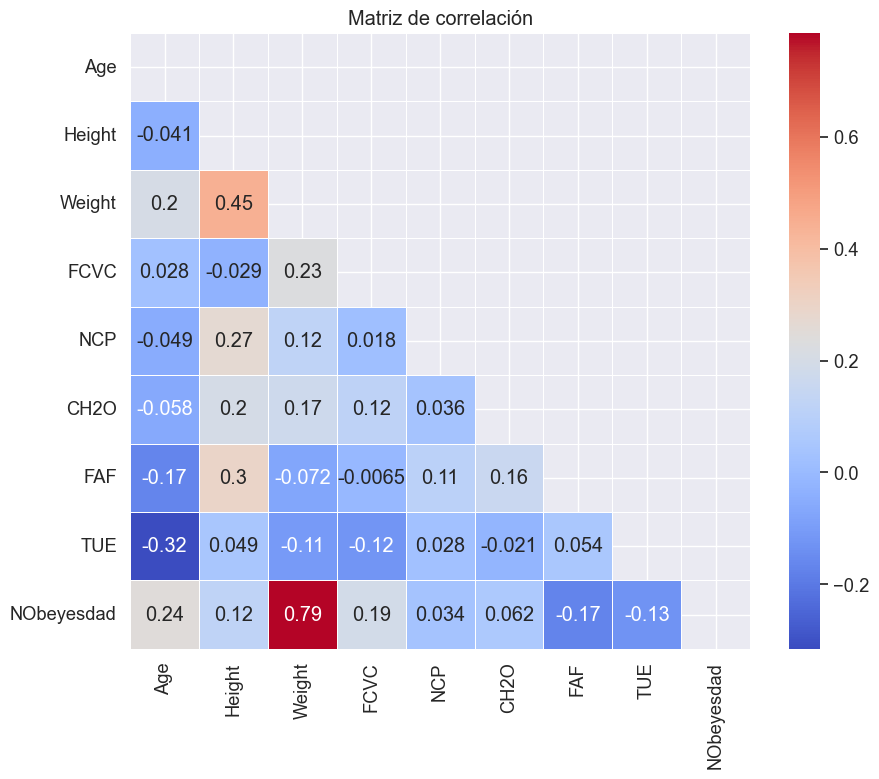

In [107]:
matriz_corr = correlation.corr(method = 'pearson')
mask = np.triu(np.ones_like(matriz_corr, dtype=bool))
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', linewidths=0.5, mask=mask)
sns.set(font_scale=1.2)
plt.title("Matriz de correlación")
plt.show()

No hay evidencias para eliminar ninguna variable.

## Regresión Logística

In [108]:
# Definir el ColumnTransformer
preprocessor = make_column_transformer(
    (MinMaxScaler(), numerical_columns),
    (OneHotEncoder(), categorical_columns)
)

# Crear un pipeline con el preprocesamiento y el modelo de clasificación
model = make_pipeline(preprocessor, LogisticRegression())
#como le voy a aplicar el transformador al pipeline, hay que proporcionarle las variables originales
explicativas = data.drop('NObeyesdad', axis=1)
y = data['NObeyesdad']
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(explicativas, y, test_size=0.2, random_state=4975)

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

Precisión del modelo: 0.9081632653061225


In [115]:
# Define the ColumnTransformer with proper handling of numerical and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ]
)

# Define the logistic regression model
logistic_regression = LogisticRegression()

# Define the space of parameters to search
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    # Add other parameters here
}

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(explicativas, y, test_size=0.2, random_state=4975)

# Apply preprocessing to the training data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Set up the RFECV with a stratified K-fold cross-validation
rfecv = RFECV(estimator=logistic_regression, step=1, cv=StratifiedKFold(5), scoring='accuracy')
rfecv.fit(X_train_preprocessed, y_train)

# Perform grid search with the logistic regression estimator
logistic_regression_grid = LogisticRegression(max_iter=5000)  # Increase max_iter if needed
grid_search = GridSearchCV(logistic_regression_grid, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_preprocessed, y_train)

# Output the best parameters
print("Best parameters from grid search:", grid_search.best_params_)

# Fit the logistic regression with the best parameters found
best_estimator = grid_search.best_estimator_
best_estimator.fit(X_train_preprocessed, y_train)

# Make predictions on the test set using the best estimator
y_pred = best_estimator.predict(X_test_preprocessed)

# Calculate the accuracy of the model with selected features
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the model with selected features:", accuracy)

# Now, we want to get the column names that correspond to the features selected by RFECV
feature_names = list(preprocessor.transformers_[0][1].get_feature_names_out(numerical_columns)) + \
                list(preprocessor.transformers_[1][1].get_feature_names_out(categorical_columns))

selected_features = [feature_names[i] for i in range(len(feature_names)) if rfecv.support_[i]]
print("Features selected by stepwise algorithm:", selected_features)


Best parameters from grid search: {'C': 100, 'solver': 'newton-cg'}
Accuracy of the model with selected features: 0.9642857142857143
Features selected by stepwise algorithm: ['Height', 'Weight', 'family_history_with_overweight_no', 'FAVC_no']


In [116]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Utilizar las mismas variables que el mejor modelo de regresión logística
X_train_nn = X_train_preprocessed[:, rfecv.support_]
X_test_nn = X_test_preprocessed[:, rfecv.support_]

# Definir una gama de posibles arquitecturas y parámetros para la red neuronal
param_grid_nn = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
}

# Crear el modelo de red neuronal con GridSearchCV
nn_model = MLPClassifier(max_iter=1000, random_state=4975)
grid_search_nn = GridSearchCV(nn_model, param_grid_nn, cv=5, scoring='accuracy')

# Entrenar la red neuronal con GridSearchCV para encontrar los mejores parámetros
grid_search_nn.fit(X_train_nn, y_train)

# Obtener el mejor modelo de red neuronal
best_nn_model = grid_search_nn.best_estimator_

# Evaluar el modelo en el conjunto de prueba
y_pred_nn = best_nn_model.predict(X_test_nn)
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print("Precisión de la mejor red neuronal:", accuracy_nn)

# Justificar los parámetros seleccionados
print("Mejores parámetros para la red neuronal:", grid_search_nn.best_params_)


Precisión de la mejor red neuronal: 0.9795918367346939
Mejores parámetros para la red neuronal: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'solver': 'adam'}


## Select K Best

Vamos ha realizar feature selection con el algoritmo K Best.

In [121]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.pipeline import Pipeline

# Definir el selector de características
selector = SelectKBest(f_classif, k=4)

# Definir la red neuronal y el espacio de parámetros para el grid search
mlp = MLPClassifier(max_iter=1000)
param_grid = {
    'mlp__hidden_layer_sizes': [(10,), (50,), (100,)],
    'mlp__activation': ['tanh', 'relu'],
    'mlp__solver': ['sgd', 'adam'],
    'mlp__alpha': [0.0001, 0.001, 0.01],
    'mlp__learning_rate_init': [0.001, 0.01, 0.1],
}

# Definir el pipeline completo, incluyendo el selector y la red neuronal
pipeline = Pipeline([
    ('selector', selector),
    ('mlp', mlp)
])

# Definir el scorer AUC para usar en el grid search
auc_scorer = make_scorer(roc_auc_score, greater_is_better=True, needs_proba=True)

# Realizar el grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring=auc_scorer)
grid_search.fit(X_train_preprocessed, y_train)

# Obtener las características seleccionadas
selected_features = grid_search.best_estimator_.named_steps['selector'].get_support(indices=True)
# Obtener nombres de características después de la transformación (incluyendo OneHotEncoded si es necesario)
transformed_feature_names = preprocessor.get_feature_names_out()

# Usar esos nombres para indexar las características seleccionadas
selected_feature_names = transformed_feature_names[selected_features]

print(f"Las 4 mejores características son: {list(selected_feature_names)}")

# Evaluar el mejor modelo en el conjunto de prueba
y_pred_proba = grid_search.predict_proba(X_test_preprocessed)[:, 1]
test_auc = roc_auc_score(y_test, y_pred_proba)
print(f"El AUC en el conjunto de prueba es: {test_auc}")

# Mostrar los mejores parámetros encontrados
print(f"Los mejores parámetros son: {grid_search.best_params_}")


Las 4 mejores características son: ['num__Weight', 'cat__family_history_with_overweight_no', 'cat__family_history_with_overweight_yes', 'cat__CAEC_Sometimes']
El AUC en el conjunto de prueba es: 0.9534285414260212
Los mejores parámetros son: {'mlp__activation': 'tanh', 'mlp__alpha': 0.001, 'mlp__hidden_layer_sizes': (10,), 'mlp__learning_rate_init': 0.001, 'mlp__solver': 'sgd'}
